In [51]:
import pandas as pd
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, GlobalAvgPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [43]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [27]:
y_train = train_df["label"].values
x_train = train_df[train_df.keys().drop(["label"])].values.reshape(-1,28,28,1)
x_train = x_train/255

In [28]:
test = test_df.values
test = test/255
test = test.reshape(-1, 28,28,1)

In [30]:
y_train = to_categorical(y_train, num_classes=10)

In [31]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

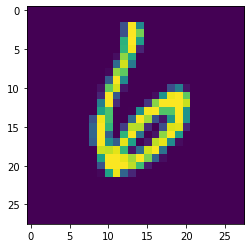

In [38]:
plt.imshow(x_train[0][:,:,0])

In [41]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation="relu", padding="Same"))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding="Same"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [44]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [46]:
igen = ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.1,
    height_shift_range=0.1
)
igen.fit(x_train)

In [47]:
model.fit(igen.flow(x_train, y_train, batch_size=32), epochs=30, validation_data=(x_val, y_val),
         verbose = 2, steps_per_epoch=x_train.shape[0] // 32)

Epoch 1/30
 - 21s - loss: 0.3924 - accuracy: 0.8726 - val_loss: 0.0633 - val_accuracy: 0.9792
Epoch 2/30
 - 7s - loss: 0.1360 - accuracy: 0.9587 - val_loss: 0.0408 - val_accuracy: 0.9868
Epoch 3/30
 - 8s - loss: 0.1051 - accuracy: 0.9671 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 4/30
 - 8s - loss: 0.0864 - accuracy: 0.9742 - val_loss: 0.0364 - val_accuracy: 0.9894
Epoch 5/30
 - 8s - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.0284 - val_accuracy: 0.9910
Epoch 6/30
 - 8s - loss: 0.0759 - accuracy: 0.9776 - val_loss: 0.0418 - val_accuracy: 0.9879
Epoch 7/30
 - 8s - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 8/30
 - 9s - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.0279 - val_accuracy: 0.9911
Epoch 9/30
 - 9s - loss: 0.0640 - accuracy: 0.9810 - val_loss: 0.0234 - val_accuracy: 0.9917
Epoch 10/30
 - 9s - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0271 - val_accuracy: 0.9923
Epoch 11/30
 - 10s - loss: 0.0568 - accuracy: 0.9835 - val_loss: 0.0

In [49]:
result = model.predict(test)

In [52]:
result = np.argmax(result, axis=1)

In [53]:
result

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [54]:
sub = pd.read_csv("sample_submission (1).csv")

In [56]:
sub["Label"] = result

In [58]:
sub.to_csv("try1.csv", index=False)